In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf

# Produce data

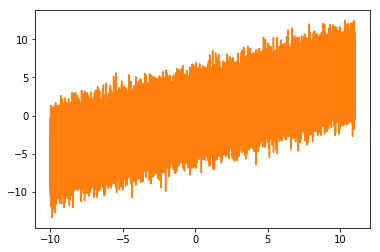

104989.49999486093 51023.238855022464


In [2]:
x=np.arange(-10,11,0.0001)
yu=x*0.5
plt.plot(x,yu)
noise=np.random.normal(0, 2, x.shape)
y=yu+noise
# xy=zip(x,y)
# xy=np.array(list(zip(u,x,y)))
xy=np.array(list(zip(x,y)))

plt.plot(x,y)
# print (x,y,z)
plt.show()
print(x.sum(),y.sum())

# Solve with Matrix

In [3]:
#j=np.full((2, 2), 1)
#print (j)
u=np.full(x.shape,1);
z=np.array(list(zip(u,x,y)))
e=z.transpose().dot(z)
print(e)

print(x.sum(), y.sum())
print (x.dot(y.transpose()))
print (y.dot(y.transpose()))
# z=np.array(list(zip(x,y)))
# print(z)
# r=r
# r=np.transpose(z).dot(j).dot(z)
# print(r)

[[ 210000.          104989.49999485   51023.23885502]
 [ 104989.49999485 7769989.50030889 3888082.72153394]
 [  51023.23885502 3888082.72153394 2788090.55983637]]
104989.49999486093 51023.238855022464
3888082.7215339476
2788090.5598363685


# Solve with np linalg function

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


0.5004954523323897 -0.007254897309795083


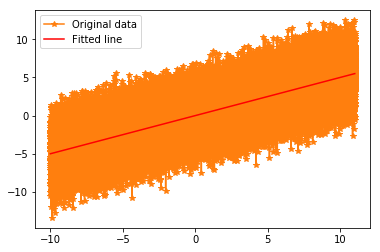

In [4]:
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
print(m, c)

# Plot the data along with the fitted line:

plt.plot(x, yu)
plt.plot(x, y, '*-', label='Original data')
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

# solve with tensorflow regression, B0[1],B1[1]

In [5]:
import tensorflow as tf

A=tf.Variable(tf.random_uniform([1],-1.0,0.0))
B=tf.Variable(tf.zeros([1]))
Y=A*x+B
cost_function=tf.reduce_mean(tf.square(Y-y))
optimizer=tf.train.GradientDescentOptimizer(.001)
train=optimizer.minimize(cost_function)



Instructions for updating:
Use `tf.global_variables_initializer` instead.


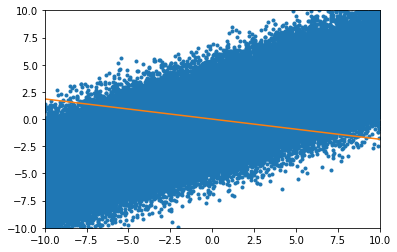

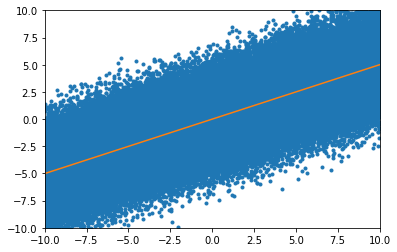

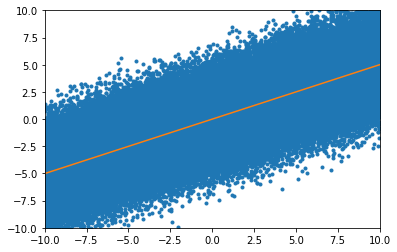

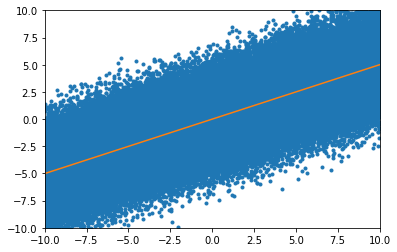

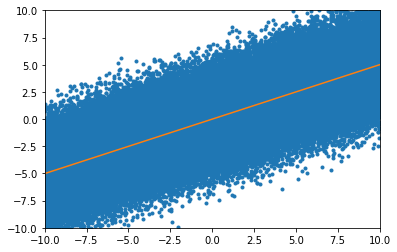

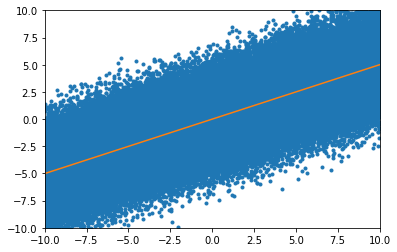

[0.5004951]
[-0.00725463]
0.5004954523323897 -0.007254897309795083


In [6]:
ITERS=50001
STEP_LOG=int(ITERS/5)
model=tf.initialize_all_variables()
with tf.Session() as session:
    session.run(model)
    for step in range(0,ITERS) :
        session.run(train)
        if (step % STEP_LOG) == 0 :
            plt.ylim((-10,10))
            plt.xlim((-10,10))
            plt.plot(x,y,'.')
            plt.plot(x,session.run(A)*x+session.run(B))
            plt.show()
    print(session.run(A))
    print(session.run(B))
print(m,c)


# slove with NN

In [7]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [12]:

# Python optimisation variables
#learning_rate = 0.001  

#data_size=1000  # Had to change these value to fit in my memory
#data_length=10
#train_input=10* np.random.rand(data_size,data_length);
#train_label=train_input.sum(axis=1);
#train_label=np.reshape(train_label,(data_size,1));

learning_rate = 0.001 
data_length=1
data_size=x.shape[0]
# print(x)
print("x length=",x.shape)
# train_input=10* np.random.rand(data_size,data_length);
#train_label=train_input.sum(axis=1);
#train_label=np.reshape(train_label,(data_size,1));

#train_input=tf.Varialbe(x)
#train_label=tf.Variable(y)
train_input=x
train_label=y



x length= (210000,)


In [13]:


# test_input= np.random.rand(data_size,data_length);
# test_label=test_input.sum(axis=1);
# test_label=np.reshape(test_label,(data_size,1));



In [14]:

tf.reset_default_graph()
nx = tf.placeholder(tf.float32, [None, data_length])
ny = tf.placeholder(tf.float32, [None, 1])


W1 = tf.Variable(tf.random_normal([data_length, 1], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([data_length, 1]), name='b1')

y_ = tf.add(tf.matmul(nx, W1), b1)

learning_rate = 0.001 
cost = tf.reduce_mean(tf.square(ny-y_))                   
optimiser=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

init_op = tf.global_variables_initializer()


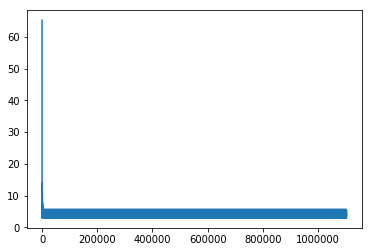

[[0.5036917]] [[-0.01542882]]
200 1050 210000
0.5004954523323897 -0.007254897309795083 (210000,)


In [15]:

session_conf = tf.ConfigProto(
    device_count={'CPU' : 1, 'GPU' : 0},
    allow_soft_placement=True,
    log_device_placement=False
)

# X=tf.Variable(x)
# Y=tf.Variable(y)

BATCH_SIZE = 200
# EPOCHS = 500
EPOCHS = int(data_size/BATCH_SIZE)

data_size=EPOCHS*BATCH_SIZE
init_op = tf.global_variables_initializer()
init_op=tf.initialize_all_variables()
with tf.Session(config=session_conf) as sess:
# with tf.Session() as sess:
    sess.run(init_op)

    loss_history = []
    for epoch_no in range(EPOCHS):
        for offset in range(0, data_size, BATCH_SIZE):
            # print(epoch_no,offset,EPOCHS)
            # batch_x = train_input[offset: offset + BATCH_SIZE].toarray()
            # batch_y = train_label[offset: offset + BATCH_SIZE].toarray()
            batch_x = train_input[offset: offset + BATCH_SIZE]
            batch_y = train_label[offset: offset + BATCH_SIZE]
            # batch_x = sess.run(X)[offset: offset + BATCH_SIZE]
            # batch_y = sess.run(Y)[offset: offset + BATCH_SIZE]
            # batch_x = tf.split(offset, offset + BATCH_SIZE, train_input)
            # batch_y = tf.split(offset, offset + BATCH_SIZE, train_label)

            
            batch_x=np.reshape(batch_x, (BATCH_SIZE,1))
            batch_y=np.reshape(batch_y, (BATCH_SIZE,1))
            
            # print(batch_x)
            _, h = sess.run([optimiser, cost], 
                     feed_dict={nx:batch_x, ny:batch_y})
            loss_history.append(h)


    plt.plot(range(len(loss_history)), loss_history)
    plt.show()

    print(sess.run(W1),sess.run(b1))
    print(BATCH_SIZE,EPOCHS, BATCH_SIZE*EPOCHS)
    print(m,c,x.shape)
    # For running test dataset
    # results, test_cost = sess.run([y_, cost], feed_dict={x: test_input, y: test_label})
    # print('test cost: {:.3f}'.format(test_cost))
    # for t1, t2 in zip(results, test_label):
    #    print('Prediction: {:.3f}, actual: {:.3f}'.format(t1[0], t2[0]))

# Practice

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [58]:
number_of_points = 500
x_point=[]
y_point=[]
a=0.22
b=0.78


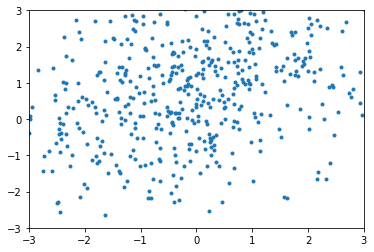

In [59]:
x_point=np.random.normal(0.0,1.5,number_of_points)
y_point=a*x_point+b+np.random.normal(0.0,1.5,x_point.shape)
# y_point=np.random.normal(0.0,0.5,x_point.shape)
plt.plot(x_point,y_point,".")
plt.ylim((-3,3))
plt.xlim((-3,3))
plt.show();

In [60]:
A=tf.Variable(tf.random_uniform([1],-1.0,0.0))
B=tf.Variable(tf.zeros([1]))
y=A*x_point+B
cost_function=tf.reduce_mean(tf.square(y-y_point))
optimizer=tf.train.GradientDescentOptimizer(.05)
train=optimizer.minimize(cost_function)

              

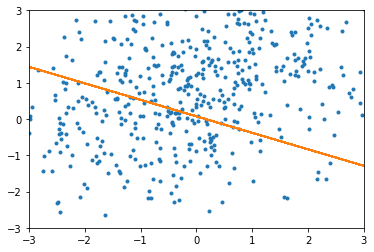

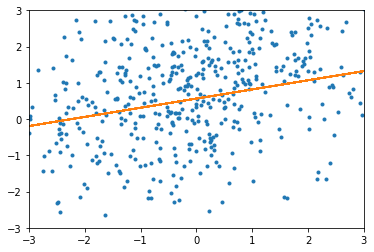

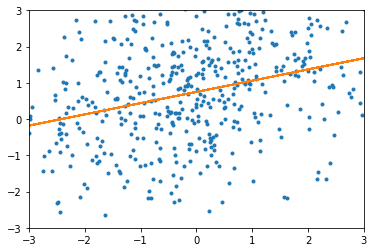

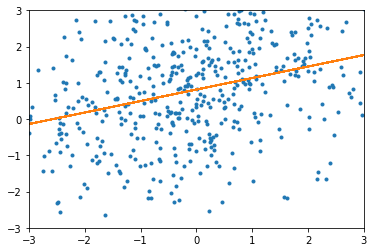

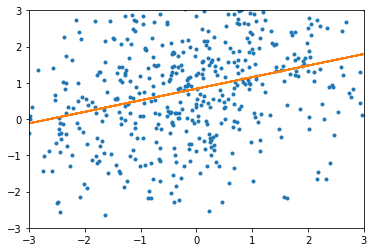

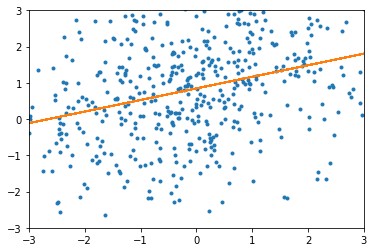

In [62]:
model=tf.initialize_all_variables()
with tf.Session() as session:
    session.run(model)
    for step in range(0,501) :
        session.run(train)
        if (step % 100) == 0 :
            plt.ylim((-3,3))
            plt.xlim((-3,3))
            plt.plot(x_point,y_point,'.')
            plt.plot(x_point,session.run(A)*x_point+session.run(B))
            plt.show()
    

In [23]:
sxx=e[1][1]-(e[0][1]*e[1][0]/e[0][0])

sxy=e[1][2]-e[0][1]*e[0][2]/e[0][0]

b1=sxx/sxy
b1=sxy/sxx
print(b1)

NameError: name 'e' is not defined

# x = np.arange(-10, 11)
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() #normalize the probabilities so their sum is 1
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))


In [23]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


1.12.0


In [22]:

tf.logging.set_verbosity(tf.logging.INFO)
sess = tf.InteractiveSession()

train = pd.read_csv('../input/train.csv')
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

test = pd.read_csv('../input/test.csv')
test = test.select_dtypes(exclude=['object'])
ID = test.Id
test.fillna(0,inplace=True)
test.drop('Id',axis = 1, inplace = True)

print("")
print("List of features contained our dataset:",list(train.columns))

FileNotFoundError: File b'../input/train.csv' does not exist

In [19]:

def main(argv):
  """Builds, trains, and evaluates the model."""
  assert len(argv) == 1
  (train, test) = imports85.dataset()

  # Switch the labels to units of thousands for better convergence.
  def to_thousands(features, labels):
    return features, labels / PRICE_NORM_FACTOR

  train = train.map(to_thousands)
  test = test.map(to_thousands)

  # Build the training input_fn.
  def input_train():
    return (
        # Shuffling with a buffer larger than the data set ensures
        # that the examples are well mixed.
        train.shuffle(1000).batch(128)
        # Repeat forever
        .repeat().make_one_shot_iterator().get_next())

  # Build the validation input_fn.
  def input_test():
    return (test.shuffle(1000).batch(128)
            .make_one_shot_iterator().get_next())

  feature_columns = [
      # "curb-weight" and "highway-mpg" are numeric columns.
      tf.feature_column.numeric_column(key="curb-weight"),
      tf.feature_column.numeric_column(key="highway-mpg"),
  ]

  # Build the Estimator.
  model = tf.estimator.LinearRegressor(feature_columns=feature_columns)

  # Train the model.
  # By default, the Estimators log output every 100 steps.
  model.train(input_fn=input_train, steps=STEPS)

  # Evaluate how the model performs on data it has not yet seen.
  eval_result = model.evaluate(input_fn=input_test)

  # The evaluation returns a Python dictionary. The "average_loss" key holds the
  # Mean Squared Error (MSE).
  average_loss = eval_result["average_loss"]

  # Convert MSE to Root Mean Square Error (RMSE).
  print("\n" + 80 * "*")
  print("\nRMS error for the test set: ${:.0f}"
        .format(PRICE_NORM_FACTOR * average_loss**0.5))

  # Run the model in prediction mode.
  input_dict = {
      "curb-weight": np.array([2000, 3000]),
      "highway-mpg": np.array([30, 40])
  }
  predict_input_fn = tf.estimator.inputs.numpy_input_fn(
      input_dict, shuffle=False)
  predict_results = model.predict(input_fn=predict_input_fn)

  # Print the prediction results.
  print("\nPrediction results:")
  for i, prediction in enumerate(predict_results):
    msg = ("Curb weight: {: 4d}lbs, "
           "Highway: {: 0d}mpg, "
           "Prediction: ${: 9.2f}")
    msg = msg.format(input_dict["curb-weight"][i], input_dict["highway-mpg"][i],
                     PRICE_NORM_FACTOR * prediction["predictions"][0])

    print("    " + msg)
  print()


In [20]:


if __name__ == "__main__":
  # The Estimator periodically generates "INFO" logs; make these logs visible.
  tf.logging.set_verbosity(tf.logging.INFO)
  tf.app.run(main=main)

AssertionError: 